In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

import warnings 
warnings.filterwarnings('ignore')


In [2]:
#importing dataset
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
#shape of dataset
df.shape

(32560, 15)

In [5]:
#checking null value in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#checking basic info about dataset
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:>

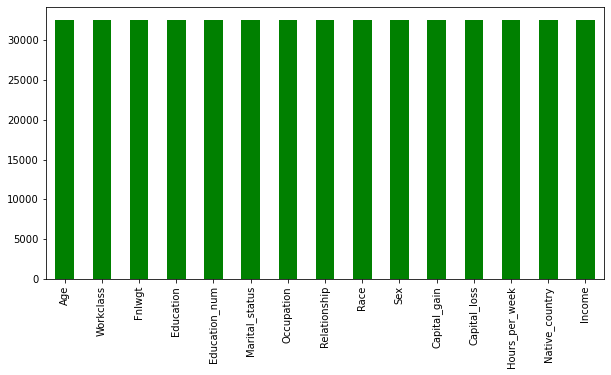

In [7]:
#checking nan value
df.count().plot.bar(figsize=(10,5),color="g")

In [8]:
#checking ? in dataset
df.isin([" ?"]).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [9]:
#replacing native country with usa
df["Native_country"] = df["Native_country"].replace(" ?","United-States")

<AxesSubplot:>

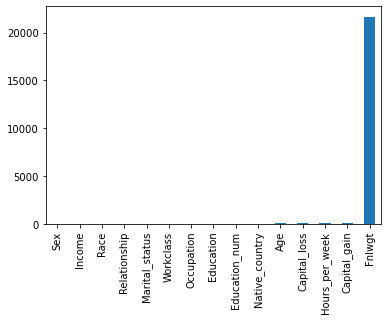

In [10]:
#checking unique in dataset
df.nunique().sort_values().plot.bar()

In [11]:
# checking for the zero
df.isin([0]).sum()

Age                   0
Workclass             0
Fnlwgt                0
Education             0
Education_num         0
Marital_status        0
Occupation            0
Relationship          0
Race                  0
Sex                   0
Capital_gain      29849
Capital_loss      31041
Hours_per_week        0
Native_country        0
Income                0
dtype: int64

<AxesSubplot:ylabel='Income'>

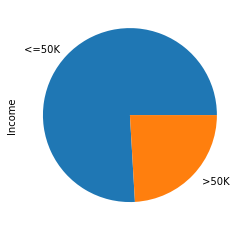

In [12]:
df["Income"].value_counts().plot.pie()

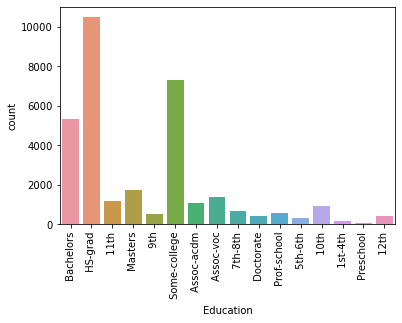

In [13]:
sns.countplot(df["Education"],data=df)
plt.xticks(rotation=90)
plt.show()

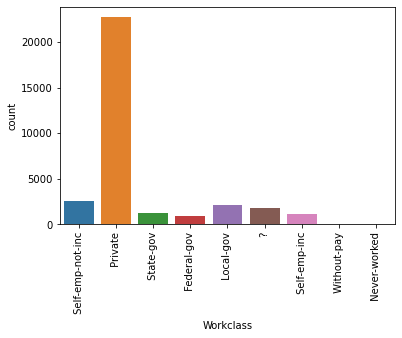

In [14]:
sns.countplot(df["Workclass"],data=df)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Education_num', ylabel='count'>

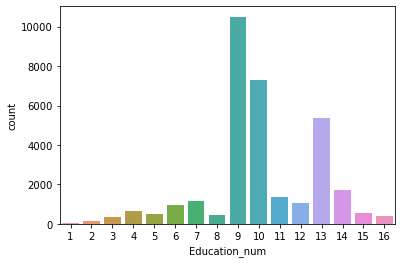

In [15]:
sns.countplot(df["Education_num"],data=df)

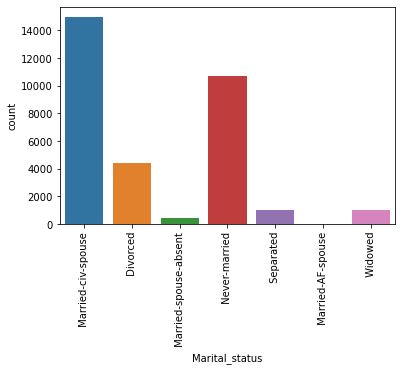

In [16]:
sns.countplot(df["Marital_status"],data=df)
plt.xticks(rotation=90)
plt.show()

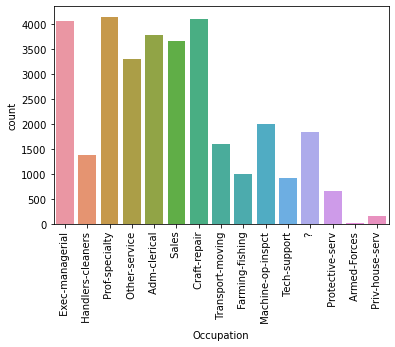

In [17]:
sns.countplot(df["Occupation"],data=df)
plt.xticks(rotation=90)
plt.show()

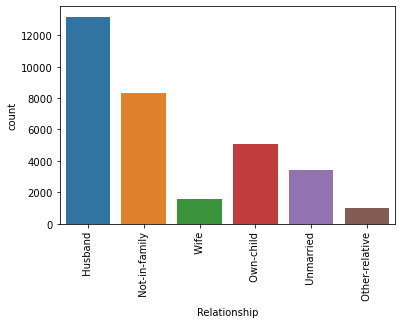

In [18]:
sns.countplot(df["Relationship"],data=df)
plt.xticks(rotation=90)
plt.show()

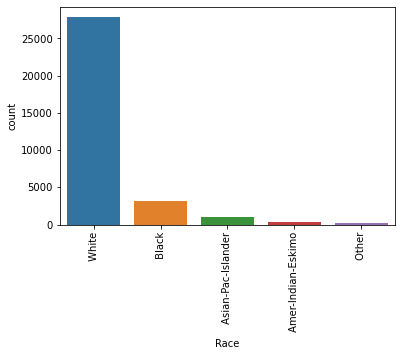

In [19]:
sns.countplot(df["Race"],data=df)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='count'>

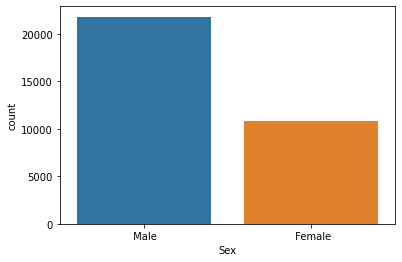

In [20]:
sns.countplot(df["Sex"],data=df)

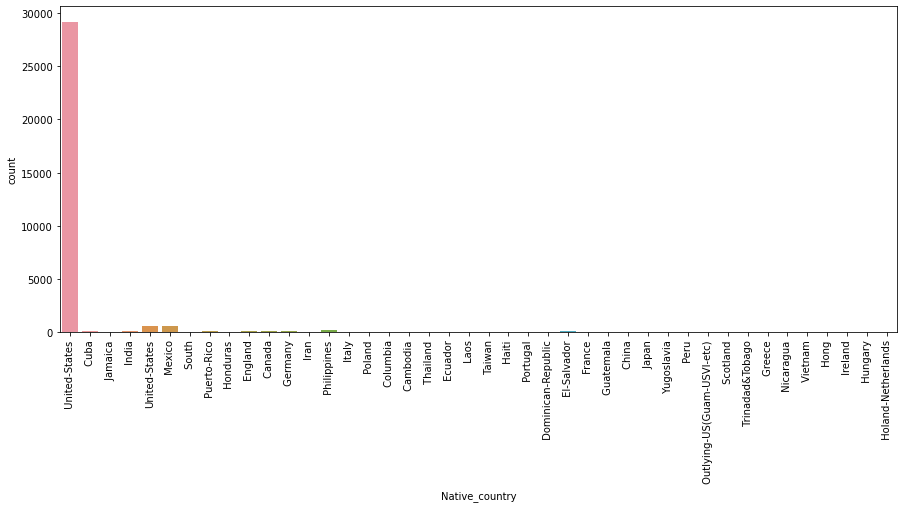

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(df["Native_country"],data=df)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

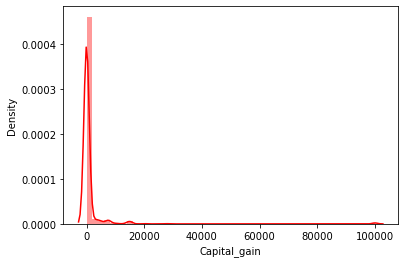

In [22]:
sns.distplot(df["Capital_gain"],color="red")

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

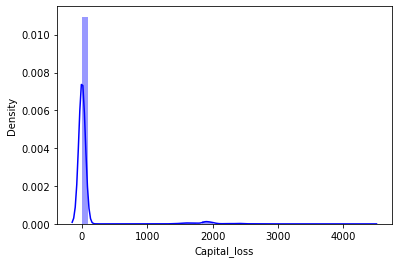

In [23]:
sns.distplot(df["Capital_loss"],color="blue")

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

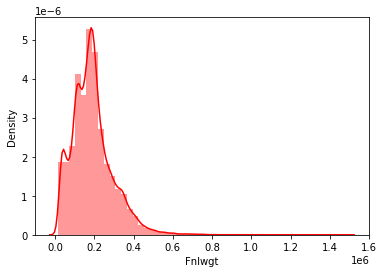

In [24]:
sns.distplot(df["Fnlwgt"],color="red")

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

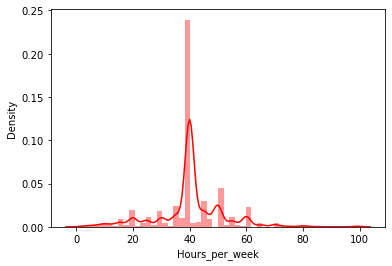

In [25]:
sns.distplot(df["Hours_per_week"],color="red")

In [26]:
# checking shape
df.shape

(32560, 15)

In [27]:
df.Native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', 'United-States',
       ' Mexico', ' South', ' Puerto-Rico', ' Honduras', ' England',
       ' Canada', ' Germany', ' Iran', ' Philippines', ' Italy',
       ' Poland', ' Columbia', ' Cambodia', ' Thailand', ' Ecuador',
       ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [28]:
#using replace to categories data
df["Workclass"]=df['Workclass'].replace([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'],[0,1,2,3,4,None,5,6,7])


In [29]:
#using replace to categories data
df["Occupation"]=df['Occupation'].replace([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'],[1,2,3,4,5,6,7,8,9,10,11,None,13,14,15])

In [30]:
df.isna().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country       0
Income               0
dtype: int64

In [31]:
# there is no "?" in dataset
df.isin([" ?"]).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [32]:
features = ["Relationship","Education","Marital_status","Relationship","Race","Sex","Native_country","Income"]

In [33]:
# for converting categorical to numerical
from sklearn.preprocessing import LabelEncoder

In [34]:
label=LabelEncoder()
for i in df[features]:
    df[i]=label.fit_transform(df[i])
    
df
    

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,0.0,83311,9,13,2,1.0,0,4,1,0,0,13,38,0
1,38,1.0,215646,11,9,0,2.0,1,4,1,0,0,40,38,0
2,53,1.0,234721,1,7,2,2.0,0,2,1,0,0,40,38,0
3,28,1.0,338409,9,13,2,3.0,5,2,0,0,0,40,4,0
4,37,1.0,284582,12,14,2,1.0,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,1.0,257302,7,12,2,11.0,5,4,0,0,0,38,38,0
32556,40,1.0,154374,11,9,2,10.0,0,4,1,0,0,40,38,1
32557,58,1.0,151910,11,9,6,5.0,4,4,0,0,0,40,38,0
32558,22,1.0,201490,11,9,4,5.0,3,4,1,0,0,20,38,0


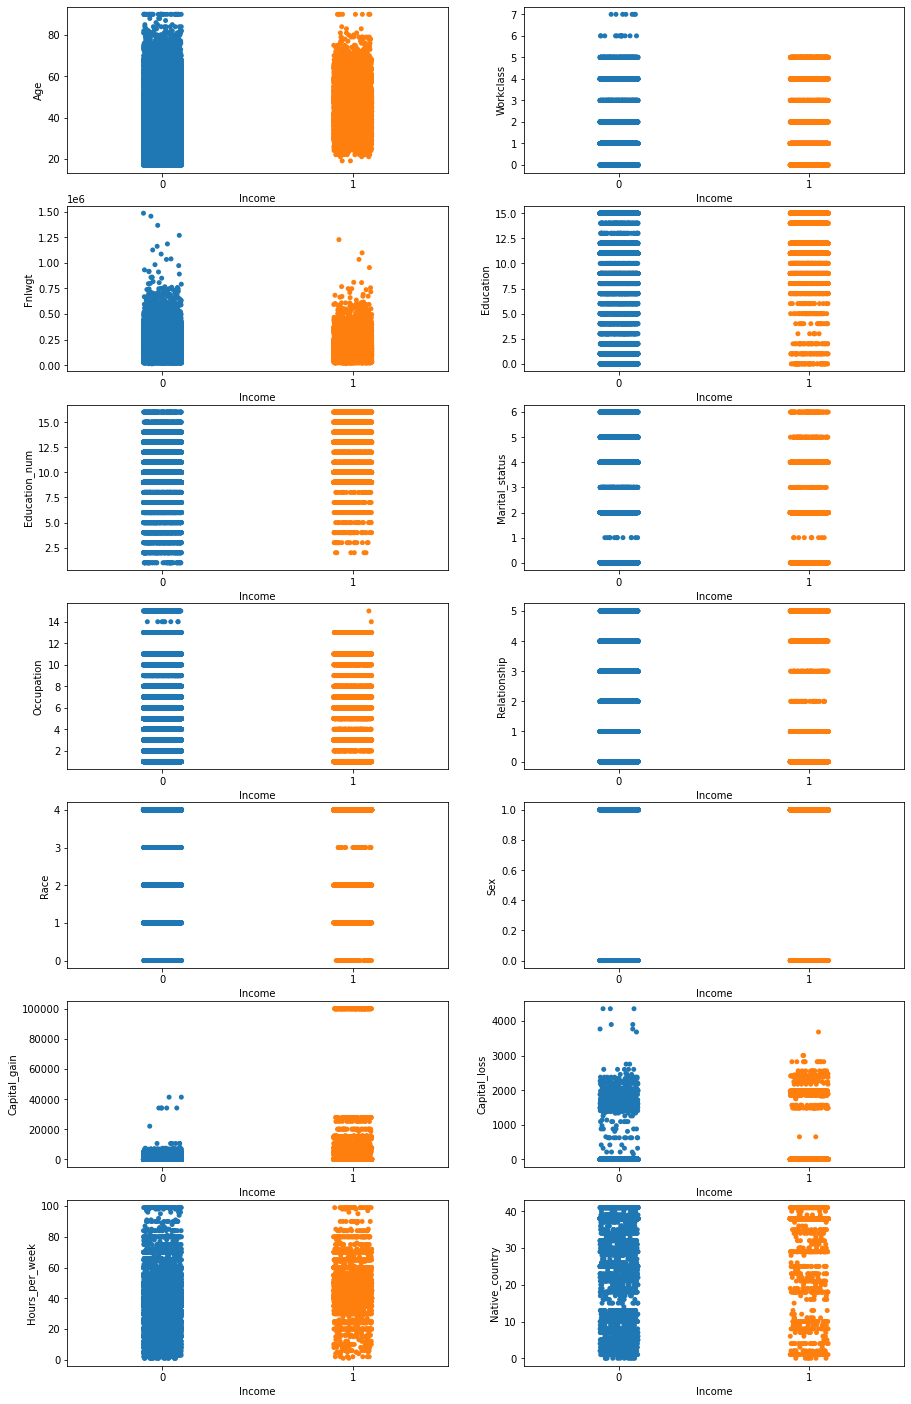

In [35]:
# bivariate analysis
plt.figure(figsize=(15,25))
plotnumber = 1
for i in df:
    if plotnumber < 15:
        ax = plt.subplot(7,2,plotnumber)
        sns.stripplot(df["Income"],df[i])
        plotnumber+=1
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

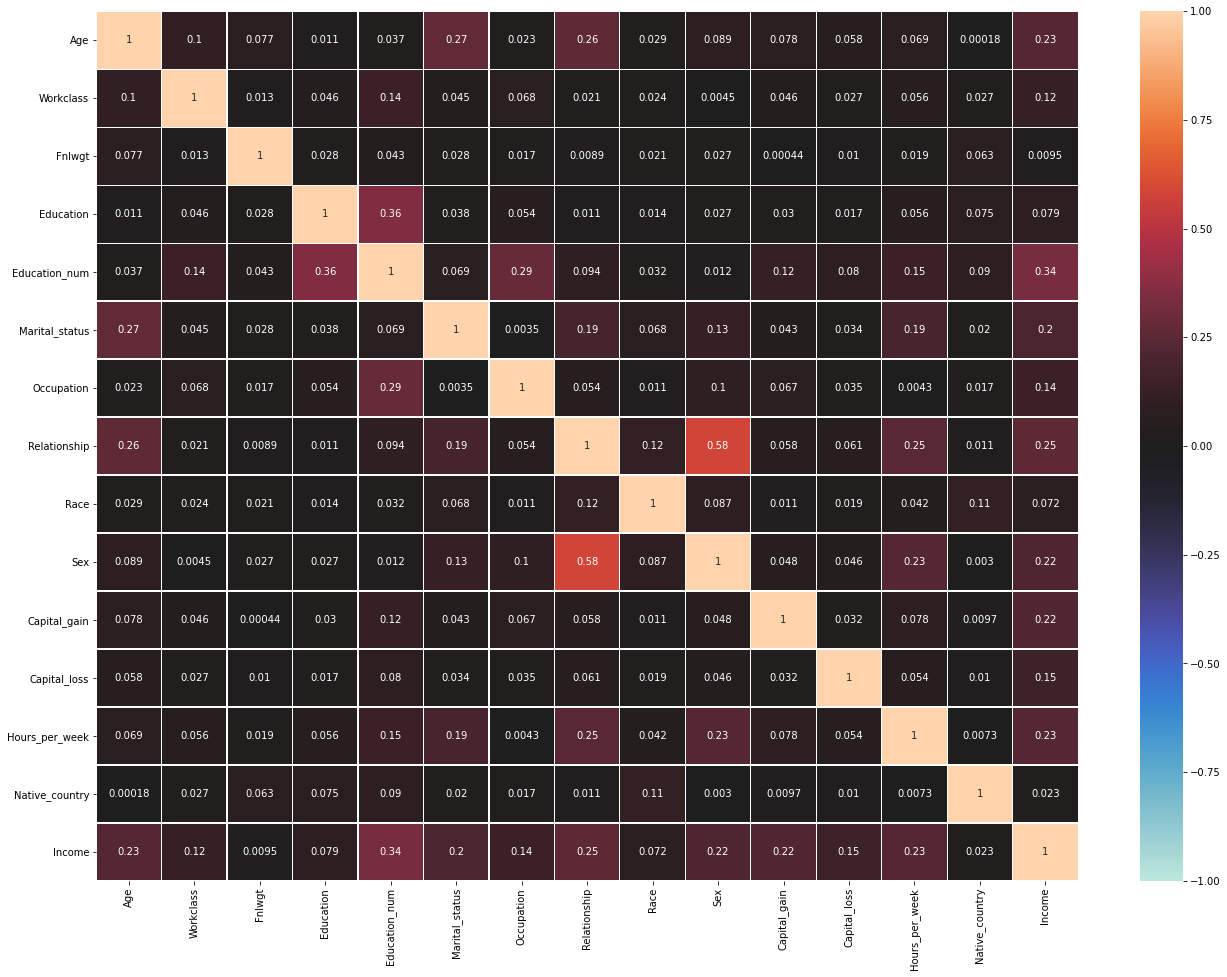

In [36]:
#multivsriste analysis
df_corr=df.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,center=0,fmt=".2g",linewidths=.2)
plt.show

## DataCleaning

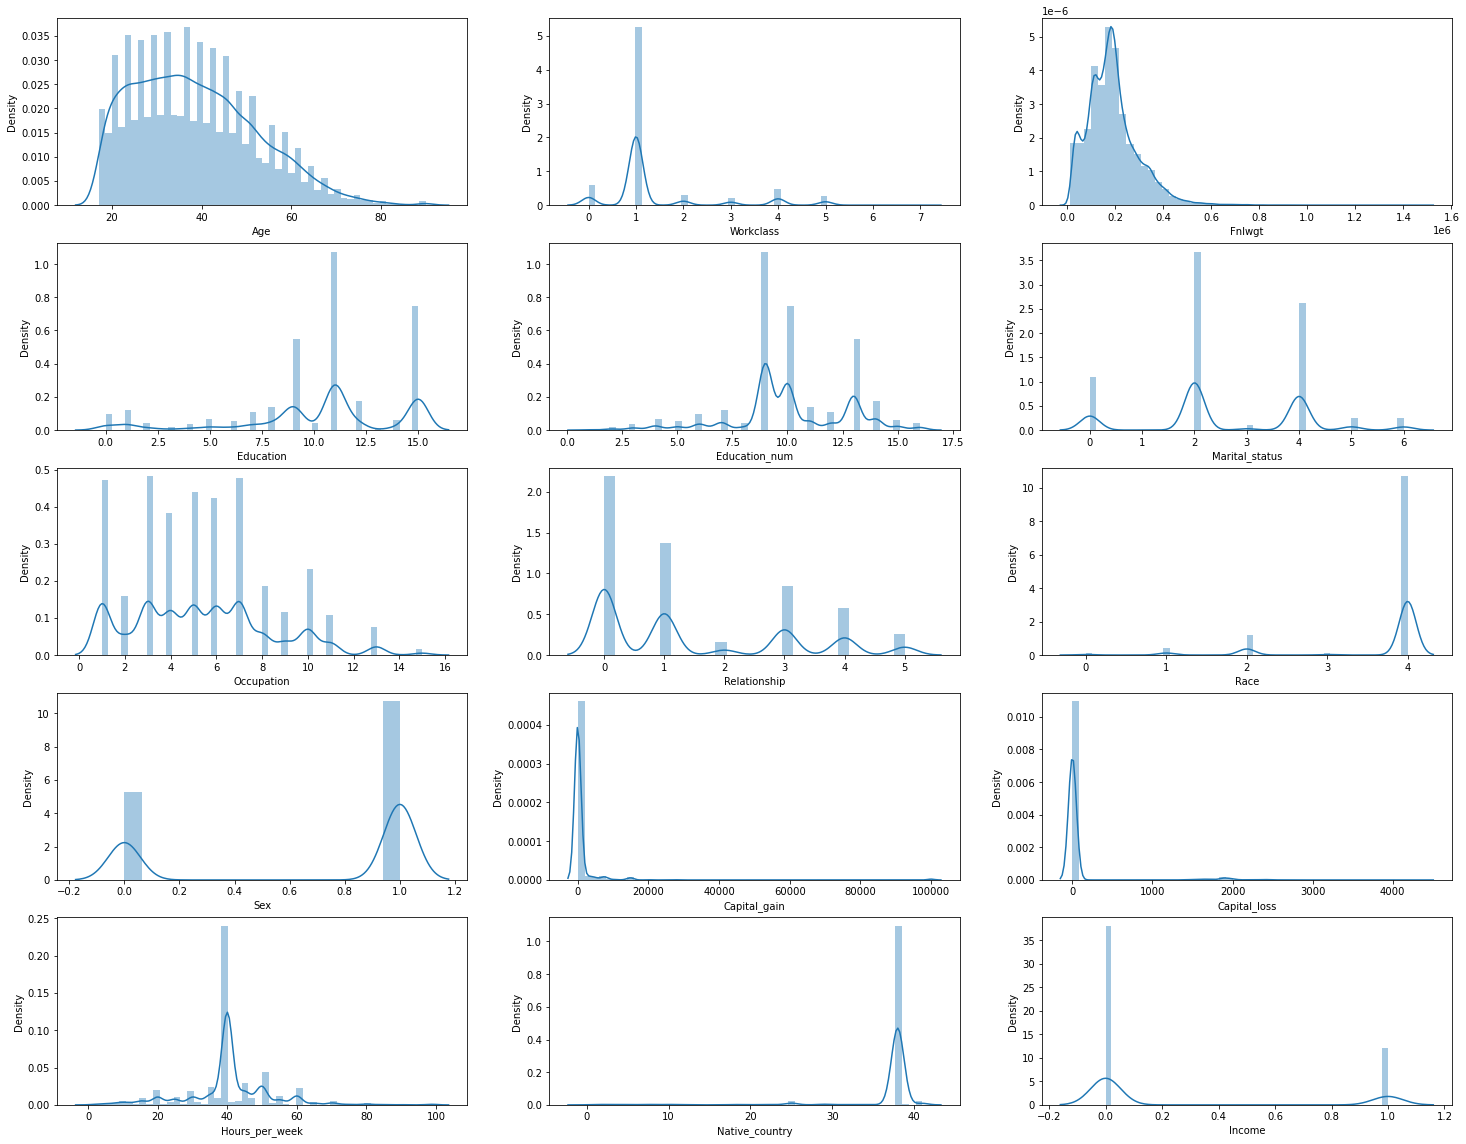

In [37]:
#using dist plot to see skewness
plt.figure(figsize=(25,20))
plotnumber = 1
for column in df:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
    plotnumber+=1
plt.show()

In [39]:
df1 = pd.DataFrame(df)

In [40]:
df1.dropna(inplace=True)

In [41]:
#for outliers removal
from scipy.stats import zscore

In [42]:
z_score =zscore(df1[["Fnlwgt","Capital_loss","Capital_gain"]])
abs_z_score = np.abs(z_score)

In [43]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [44]:
filter = (abs_z_score < 3.5).all(axis=1)
new_df = df1[filter]

In [45]:
new_df.shape

(29023, 15)

In [46]:
new_df.skew()

Age                0.546155
Workclass          1.947462
Fnlwgt             0.734438
Education         -0.934517
Education_num     -0.320122
Marital_status    -0.033233
Occupation         0.508460
Relationship       0.788609
Race              -2.450573
Sex               -0.726197
Capital_gain       5.005842
Capital_loss      15.188716
Hours_per_week     0.332628
Native_country    -4.174726
Income             1.280302
dtype: float64

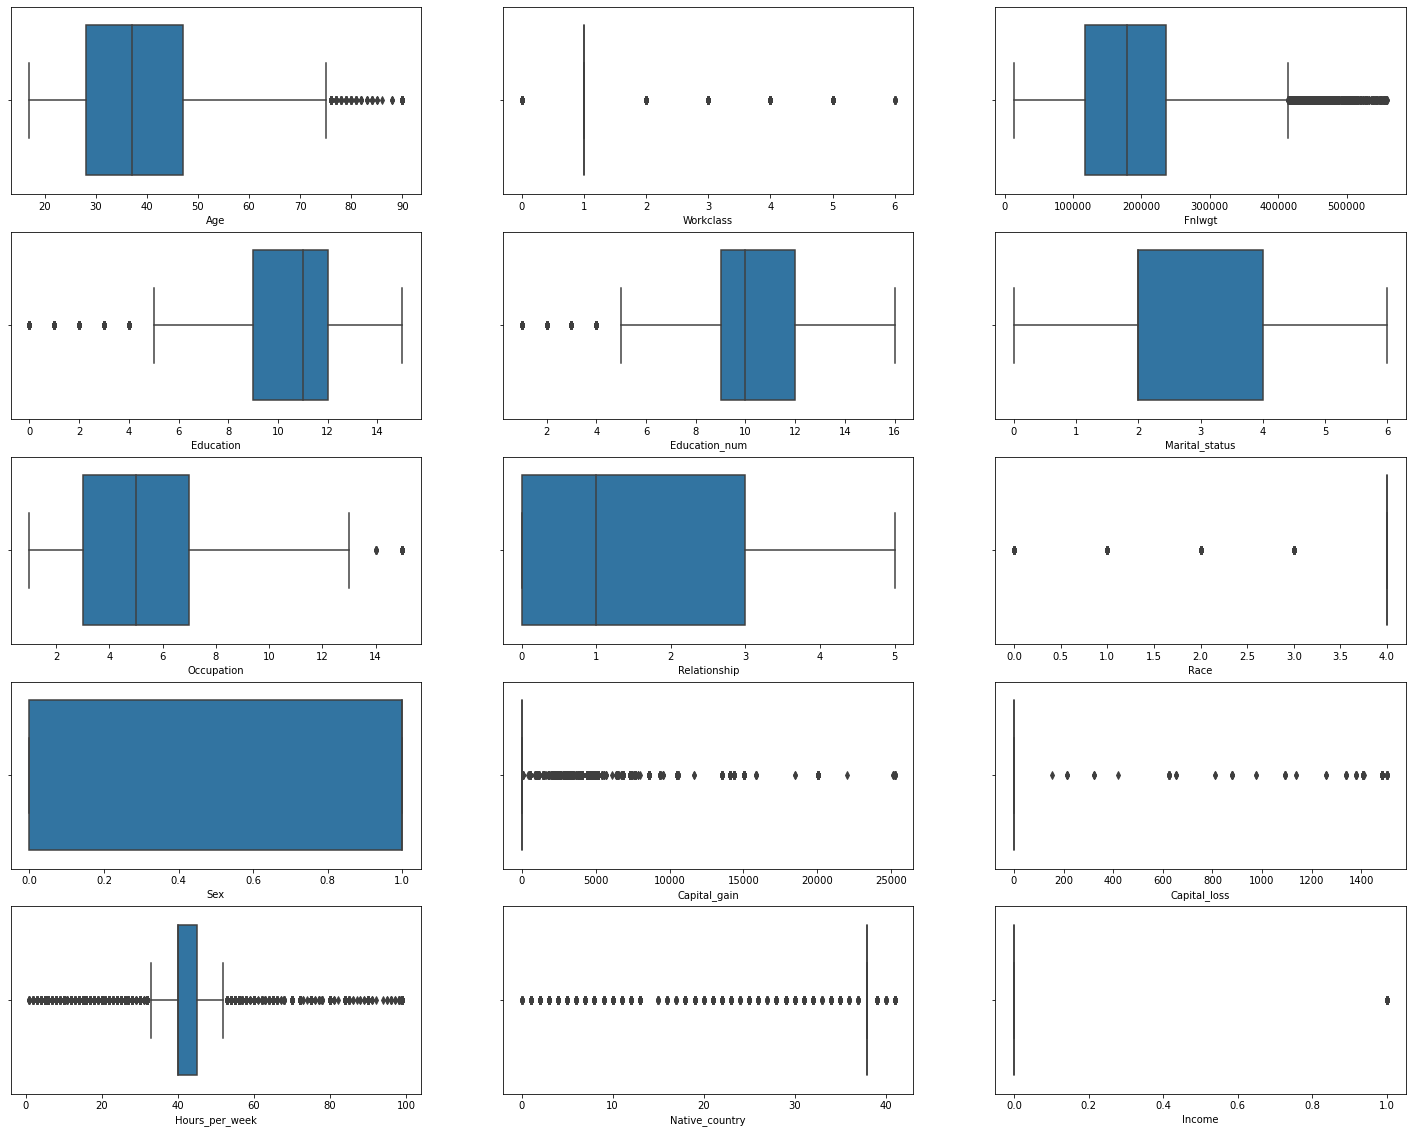

In [47]:
#using box plot to see outliers in the dataset
plt.figure(figsize=(25,20))
plotnumber = 1
for column in new_df:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(new_df[column])
    plotnumber+=1
plt.show()

In [48]:
#for checking skewness
new_df.skew()

Age                0.546155
Workclass          1.947462
Fnlwgt             0.734438
Education         -0.934517
Education_num     -0.320122
Marital_status    -0.033233
Occupation         0.508460
Relationship       0.788609
Race              -2.450573
Sex               -0.726197
Capital_gain       5.005842
Capital_loss      15.188716
Hours_per_week     0.332628
Native_country    -4.174726
Income             1.280302
dtype: float64

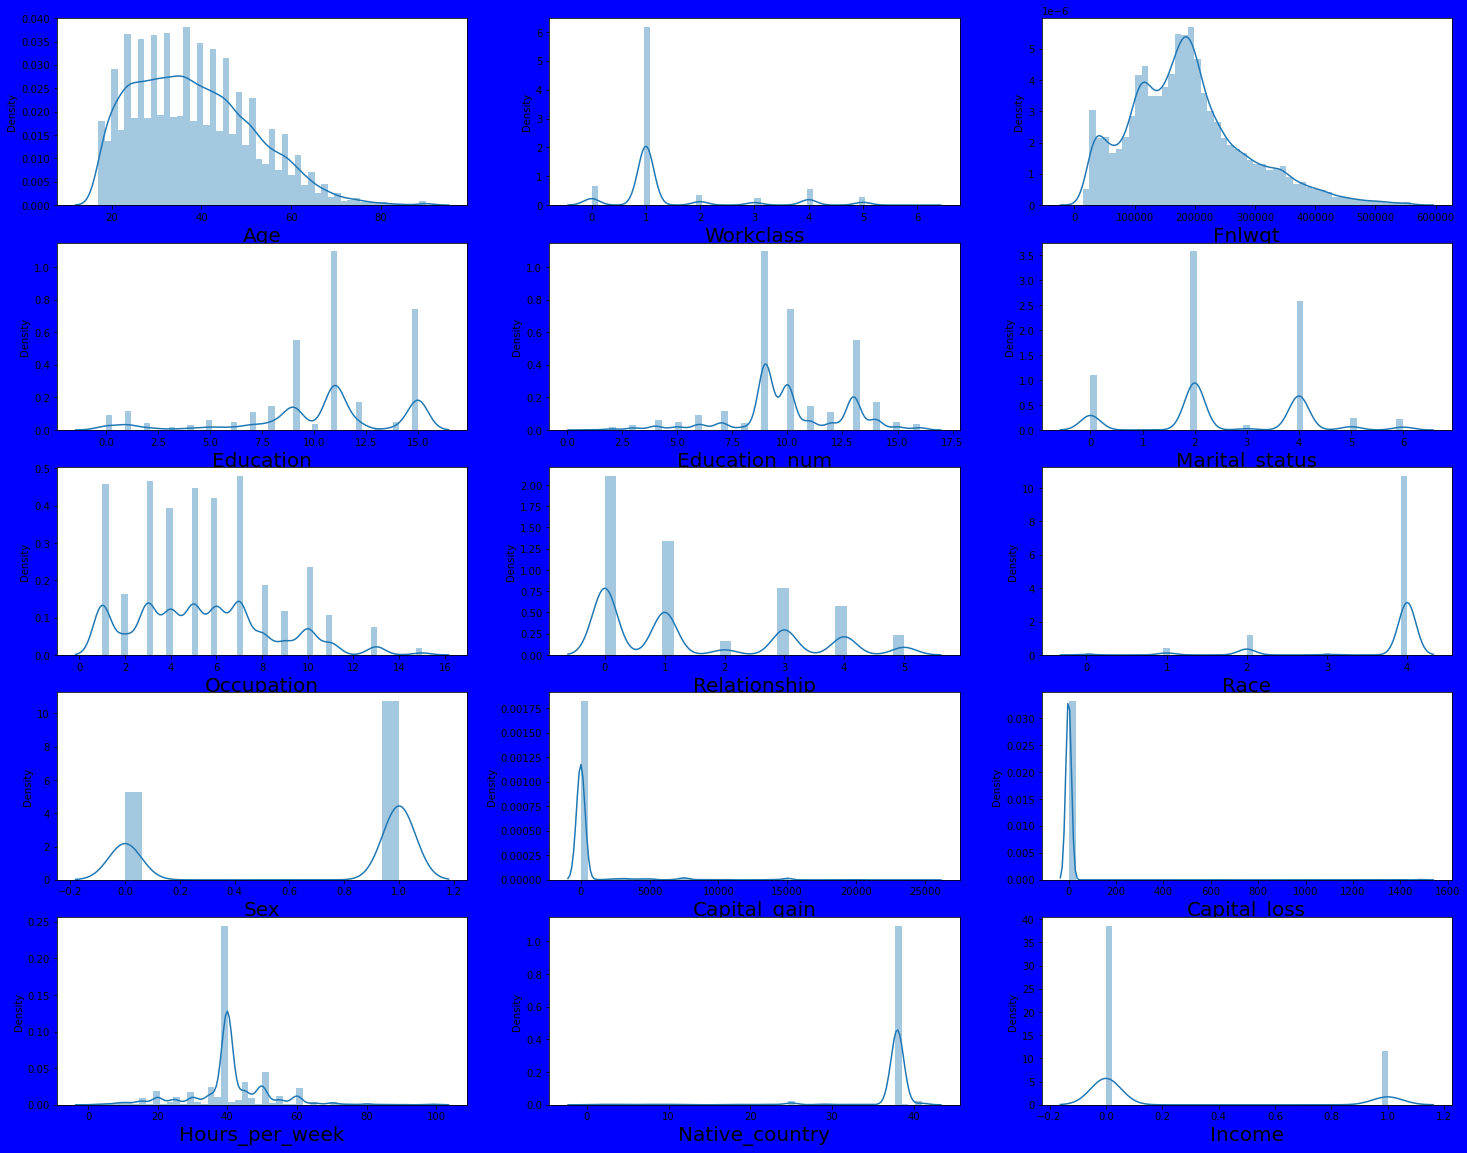

In [49]:
#for checking skewness
plt.figure(figsize=(25,20),facecolor='blue')
plotnumber = 1
for column in new_df:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(new_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [50]:
# for skewness removal 
from sklearn.preprocessing import PowerTransformer
scale=PowerTransformer(method="yeo-johnson")

In [51]:
a=["Capital_gain","Capital_loss","Fnlwgt"]

In [52]:
new_df[a]=scale.fit_transform(new_df[a])

In [53]:
new_df.skew()

Age                0.546155
Workclass          1.947462
Fnlwgt            -0.025025
Education         -0.934517
Education_num     -0.320122
Marital_status    -0.033233
Occupation         0.508460
Relationship       0.788609
Race              -2.450573
Sex               -0.726197
Capital_gain       3.047101
Capital_loss      13.993319
Hours_per_week     0.332628
Native_country    -4.174726
Income             1.280302
dtype: float64

<AxesSubplot:xlabel='Income', ylabel='count'>

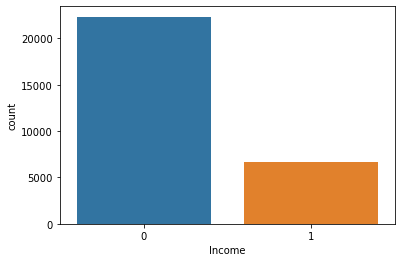

In [54]:
#there is huge class imbalance
sns.countplot(new_df["Income"],data=new_df)

In [55]:
from sklearn .utils import resample
z=new_df[new_df.Income==0]
a=new_df[new_df.Income==1]

In [56]:
up=resample(a,replace=True,n_samples=len(z),random_state=0)

In [57]:
new_df1=pd.concat([z,up])
new_df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,0.0,-1.110777,9,13,2,1.0,0,4,1,-0.298880,-0.071105,13,38,0
1,38,1.0,0.411284,11,9,0,2.0,1,4,1,-0.298880,-0.071105,40,38,0
2,53,1.0,0.586581,1,7,2,2.0,0,2,1,-0.298880,-0.071105,40,38,0
3,28,1.0,1.437357,9,13,2,3.0,5,2,0,-0.298880,-0.071105,40,4,0
4,37,1.0,1.014547,12,14,2,1.0,5,4,0,-0.298880,-0.071105,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28657,47,1.0,-1.183024,9,13,2,6.0,0,4,1,-0.298880,-0.071105,60,38,1
14595,43,0.0,2.032588,15,10,2,6.0,0,4,1,3.345855,-0.071105,50,25,1
23421,51,5.0,-0.116802,14,15,2,3.0,0,4,1,-0.298880,-0.071105,40,38,1
22288,41,0.0,-0.932356,12,14,4,1.0,1,1,1,-0.298880,-0.071105,45,38,1


<AxesSubplot:xlabel='Income', ylabel='count'>

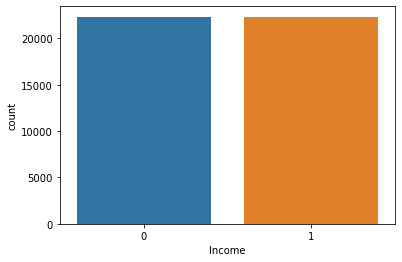

In [58]:
# class is balanced
sns.countplot(new_df1["Income"],data=new_df1)

In [59]:
# final dataset
x = new_df1.drop(columns=["Income","Capital_gain","Capital_loss"],axis=1)
y = new_df1["Income"]

In [60]:
# model building
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

In [61]:
# scaling dataset
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

In [128]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=50)

# LogisticRegression

In [129]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [130]:
y_pred = lr.predict(x_test)

In [131]:
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      6703
           1       0.75      0.77      0.76      6698

    accuracy                           0.75     13401
   macro avg       0.75      0.75      0.75     13401
weighted avg       0.75      0.75      0.75     13401



In [132]:
accuracy_score(y_test,y_pred)

0.7520334303410193

In [133]:
cross_val_score(lr,x_scaled,y,cv=4).mean()

0.7459593725295288

In [134]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[4953 1750]
 [1573 5125]]


# GradientBoostingClassifier

In [135]:
gd = GradientBoostingClassifier()
gd.fit(x_train,y_train)

GradientBoostingClassifier()

In [136]:
y_pred = gd.predict(x_test)

In [137]:
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.85      0.77      0.81      6703
           1       0.79      0.87      0.83      6698

    accuracy                           0.82     13401
   macro avg       0.82      0.82      0.82     13401
weighted avg       0.82      0.82      0.82     13401



In [138]:
accuracy_score(y_test,y_pred)

0.8179986568166555

In [139]:
cross_val_score(gd,x_scaled,y,cv=4).mean()

0.8151333008790997

In [140]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[5144 1559]
 [ 880 5818]]


# XGBClassifier

In [141]:
xg = XGBClassifier(verbosity=0)
xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [142]:
y_pred = xg.predict(x_test)

In [143]:
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.90      0.80      0.85      6703
           1       0.82      0.91      0.86      6698

    accuracy                           0.86     13401
   macro avg       0.86      0.86      0.86     13401
weighted avg       0.86      0.86      0.86     13401



In [144]:
accuracy_score(y_test,y_pred)

0.8563540034325796

In [146]:
cross_val_score(xg,x_scaled,y,cv=4).mean()

0.8556750746289146

In [147]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[5358 1345]
 [ 580 6118]]


# BaggingClassifier

In [148]:
bg = BaggingClassifier()
bg.fit(x_train,y_train)

BaggingClassifier()

In [149]:
y_pred = bg.predict(x_test)

In [150]:
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.95      0.87      0.91      6703
           1       0.88      0.95      0.92      6698

    accuracy                           0.91     13401
   macro avg       0.91      0.91      0.91     13401
weighted avg       0.91      0.91      0.91     13401



In [151]:
accuracy_score(y_test,y_pred)

0.9113498992612492

In [152]:
cross_val_score(bg,x_scaled,y,cv=4).mean()

0.9110365537831099

In [153]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[5817  886]
 [ 302 6396]]


# BaggingClassifier is my best model

In [177]:
# hyper parameter tuning
grid_params={"n_estimators":[100,200,300,400,500],
             "bootstrap_features":[True,False],
             "bootstrap":[True,False],
             "oob_score":[True,False]
             }

In [178]:
grid_search = GridSearchCV(estimator =bg,
                          param_grid = grid_params,
                          cv=3,n_jobs=-1)

In [179]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(bootstrap=False,
                                         bootstrap_features=True,
                                         n_estimators=200),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'n_estimators': [100, 200, 300, 400, 500],
                         'oob_score': [True, False]})

In [180]:
grid_search.best_params_

{'bootstrap': False,
 'bootstrap_features': True,
 'n_estimators': 400,
 'oob_score': False}

In [181]:
bg = BaggingClassifier(bootstrap=False,bootstrap_features=True,n_estimators=400,oob_score=False)
bg.fit(x_train,y_train)

BaggingClassifier(bootstrap=False, bootstrap_features=True, n_estimators=400)

In [182]:
y_pred = bg.predict(x_test)

In [183]:
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.96      0.88      0.92      6703
           1       0.89      0.96      0.93      6698

    accuracy                           0.92     13401
   macro avg       0.93      0.92      0.92     13401
weighted avg       0.93      0.92      0.92     13401



In [184]:
accuracy_score(y_test,y_pred)

0.9241847623311693

In [186]:
cross_val_score(bg,x_scaled,y,cv=4).mean()

0.921065592119991

In [187]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[5931  772]
 [ 244 6454]]


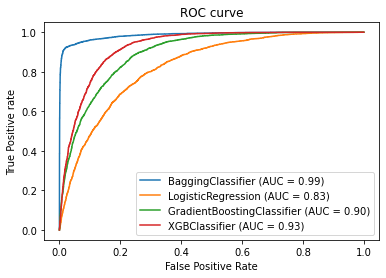

In [188]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve
disp = plot_roc_curve(bg,x_test,y_test)

plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gd,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xg,x_test,y_test,ax=disp.ax_)


plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

In [189]:
import pickle
filename='census.pk1'
pickle.dump(bg,open(filename,'wb'))